# import all required libraries 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pyreadstat  # This reads .sav files

# import sav file provided by Dr. Shurendra Ghimire Sir (I renamed without space to make it error free)
# File should be in the same folder or include the full address location

In [2]:
df, meta = pyreadstat.read_sav('SPSS-Ready-Data.sav')

# at first i was unclear what was actually inside that file so i exported it to csv format

In [4]:
df.to_csv('exported_data.csv', index=False)
print("Export complete. File saved as 'exported_data.csv'")

Export complete. File saved as 'exported_data.csv'


# To measure satisfaction there was no particular satisfaction field which could measure the satisfaction so i create a satisfaction list on various variables which we can change later on. [24 variables were used to measure satisfaction.]

In [5]:
satisfaction_cols = [
    '@14.Realworld_Use',
    '@15.Thecourse_uptodate',
    '@16.Thecoursecontribute_careerplans',
    '@17.Course_theoryandpractical',
    '@18.Teacher_subjectareas',
    '@19.Classroomteaching',
    '@20.Teachers_available',
    '@21.Practical_effective',
    '@22.Teaching_practical',
    '@23.Thelibrary_resource',
    '@24.Com_Internet',
    '@25.Thecampus_Software',
    '@26.Projector',
    '@27.Campus_support_assignmentsandpr',
    '@28.staff_cooperativeandhelpful',
    '@29.Toiletsandsanitation',
    '@30.Drinkingwater',
    '@31.canteen',
    '@32.ECA',
    '@33.Internalassessment',
    '@34.Teachers_feedback',
    '@35.Makeupexams',
    '@36.Finalexams',
    '@37.Results_published'
]

# an 'average satisfaction' column per respondent

In [6]:
df['Avg_Satisfaction'] = df[satisfaction_cols].mean(axis=1)

# Group by semester

In [7]:
semester_satisfaction = df.groupby('@3.Semester')['Avg_Satisfaction'].mean().sort_index()

# Lets see by printing

In [13]:
# Convert to DataFrame
semester_satisfaction_df = semester_satisfaction.reset_index()

# Rename columns (optional)
semester_satisfaction_df.columns = ['Semester', 'Average Satisfaction']

print("Average Satisfaction by Semester:")
print(semester_satisfaction_df)

Average Satisfaction by Semester:
   Semester  Average Satisfaction
0       2.0              3.312500
1       3.0              3.401515
2       5.0              3.505208
3       7.0              3.416667
4       8.0              3.362745


# Visualize with matplotlib [added circle in vertices]

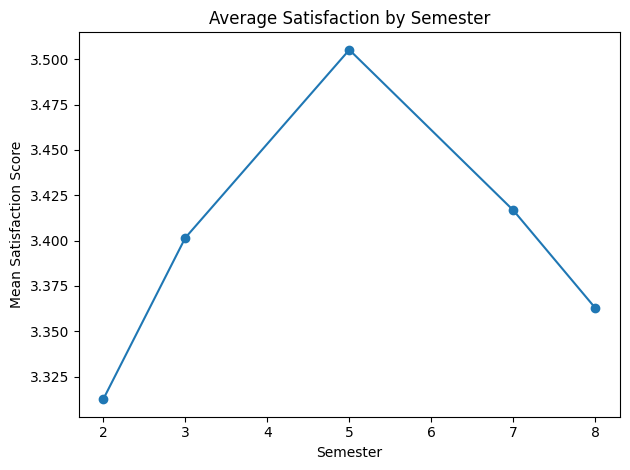

In [14]:
semester_satisfaction.plot(kind='line', marker = 'o')
plt.title("Average Satisfaction by Semester")
plt.xlabel("Semester")
plt.ylabel("Mean Satisfaction Score")
plt.tight_layout()
plt.show()

# Which semester is the most satisfied and which is the least, in comparison?

based on the data to answer the first question :

Among the surveyed students, Semester 5 reported the highest average satisfaction (M = 3.51), while Semester 2 reported the lowest (M = 3.31). This suggests that students in Semester 5 are more satisfied with their academic and institutional experience compared to other semesters.